Exclude the records that SATIVA has highligted, redo the alignment and rebuild the tree.

In [1]:
from reprophylo import *

In [2]:
pj=Project('../fetch_clean_align_tree/mammal_target_locus.csv', pickle='mam_post_SATIVA.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [3]:
pj.read_embl_genbank(['../fetch_clean_align_tree/12S_preSATIVA_mammals.gb'])

/home/reprophylo/reprophylo.py:1015: UserWarning: Version control off
  warnings.warn('Version control off')


In [4]:
pj.extract_by_locus()

Set the stage:

In [5]:
recs_to_keep = {'rrnS': []}
recs_to_drop = {'rrnS': []}

print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 0
to keep: 0
TOTAL: 0


Record all record ids and assign them the status keep.

In [6]:
for r in pj.records_by_locus['rrnS']:
    recs_to_keep['rrnS'].append("_".join(r.id.split("_")[:-1]))

In [7]:
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 0
to keep: 1080
TOTAL: 1080


How many do we want to drop? Parse SATIVA output and extract records ids putatively mislabeled.

In [8]:
rec_mislabelled = {}
sativa=open('../SATIVA/12S.mis', 'r')

for line in sativa:
    if not line.startswith(";"):
        rec_mislabelled[line.split("\t")[0]] = line.split("\t")[4]
        

In [9]:
print len(rec_mislabelled)

34


Adjust lists accordingly.

In [10]:
for r in rec_mislabelled:
    print r
    if not r in recs_to_drop['rrnS']:
        print "\tadd to droplist"
        recs_to_drop['rrnS'].append(r)
    for i in reversed(range(len(recs_to_keep['rrnS']))):
#        print i
        if r in recs_to_keep['rrnS'][i]:
            print "\tremove from keeplist"
            del(recs_to_keep['rrnS'][i])

JQ287755.1
	add to droplist
	remove from keeplist
JQ287754.1
	add to droplist
	remove from keeplist
AJ630114.1
	add to droplist
	remove from keeplist
HQ529663.1
	add to droplist
	remove from keeplist
JQ287752.1
	add to droplist
	remove from keeplist
AB018586.1
	add to droplist
	remove from keeplist
JQ287757.1
	add to droplist
	remove from keeplist
Y08208.1
	add to droplist
	remove from keeplist
JQ287756.1
	add to droplist
	remove from keeplist
HM637771.1
	add to droplist
	remove from keeplist
NC_001700.1
	add to droplist
	remove from keeplist
FM165432.1
	add to droplist
	remove from keeplist
DQ867007.1
	add to droplist
	remove from keeplist
AY495467.1
	add to droplist
	remove from keeplist
U13083.1
	add to droplist
	remove from keeplist
JF339973.1
	add to droplist
	remove from keeplist
HQ529670.1
	add to droplist
	remove from keeplist
AF320512.1
	add to droplist
	remove from keeplist
KP142702.1
	add to droplist
	remove from keeplist
HM623877.1
	add to droplist
	remove from keeplist
HQ5

In [11]:
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 34
to keep: 1046
TOTAL: 1080


Write out good records in full Genbank format including all metadata. Adjust to valid species and taxids before doing it.

Identify records with Subspecies.

In [12]:
from collections import defaultdict

Seqs = []
taxon_to_taxid = {}
recs_to_adjust = defaultdict(list)
taxon_to_recs = defaultdict(list)

for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        Seqs.append(r)
        
        source = [f for f in r.features if f.type == 'source'][0]

        #screen for subspecies and record taxids of valid species
        #if valid species record the taxid
        if (len(source.qualifiers['organism'][0].split(" ")) == 2):
            print source.qualifiers['organism'][0],
            if 'db_xref' in source.qualifiers:
#                print source.qualifiers['db_xref']
                for t in source.qualifiers['db_xref']:
#                    print t
                    if 'taxon' in t:
                        if not source.qualifiers['organism'][0] in taxon_to_taxid:
                            print " .. add to records"
                            taxon_to_taxid[source.qualifiers['organism'][0]] = t.split(":")[1]
                        else:
                            print " .. already covered"
                        taxon_to_recs[source.qualifiers['organism'][0]].append(r.id)
        #if the species status is 'sp.' but has a valid taxid
        elif (len(source.qualifiers['organism'][0].split(" ")) > 2 and source.qualifiers['organism'][0].split(" ")[1] == 'sp.'):
            print source.qualifiers['organism'][0],
            if 'db_xref' in source.qualifiers:
                for t in source.qualifiers['db_xref']:
                    if 'taxon' in t:
                        if not source.qualifiers['organism'][0] in taxon_to_taxid:
                            print " .. add to records"
                            taxon_to_taxid[source.qualifiers['organism'][0]] = t.split(":")[1]
                        else:
                            print " .. already covered" 
                        taxon_to_recs[source.qualifiers['organism'][0]].append(r.id)
        #all other cases we consider dubious, e.g. supspecies
        else:
            print "subspecies: %s" %source.qualifiers['organism'][0]
            recs_to_adjust[r.id] = []

Equus caballus  .. add to records
Ovis aries  .. add to records
Mustela putorius  .. add to records
Balaenoptera physalus  .. add to records
subspecies: Canis lupus familiaris
Myotis myotis  .. add to records
Sus scrofa  .. add to records
Mustela erminea  .. add to records
Myotis brandtii  .. add to records
subspecies: Canis lupus familiaris
subspecies: Canis lupus familiaris
Ovis aries  .. already covered
Equus caballus  .. already covered
Equus caballus  .. already covered
Ovis aries  .. already covered
Bos taurus  .. add to records
Bos taurus  .. already covered
subspecies: Sciurus vulgaris fuscoater
Equus caballus  .. already covered
subspecies: Canis lupus familiaris
Equus caballus  .. already covered
Capra hircus  .. add to records
Capra hircus  .. already covered
Bos taurus  .. already covered
Myodes glareolus  .. add to records
Equus caballus  .. already covered
Myodes glareolus  .. already covered
Equus caballus  .. already covered
Myodes glareolus  .. already covered
Bos taur

Check if any of the taxa that were considered dubious are not already covered in the list after removing subspecies.

In [13]:
from collections import defaultdict

to_fetch = defaultdict(list)

for r in Seqs:
    if r.id in recs_to_adjust:
        source = [f for f in r.features if f.type == 'source'][0]
        adjust_from = source.qualifiers['organism'][0]
        adjust_to = " ".join(adjust_from.split(" ")[:2])
        print "%s -> %s" %(adjust_from,adjust_to)
        if adjust_to in taxon_to_taxid:
            taxon_to_recs[adjust_to].append(r.id)
            recs_to_adjust[r.id].append(adjust_to)
            recs_to_adjust[r.id].append(taxon_to_taxid[adjust_to])
        else:
            to_fetch[adjust_to].append(r.id)
            recs_to_adjust[r.id].append(adjust_to)

Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Sciurus vulgaris fuscoater -> Sciurus vulgaris
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Sus scrofa cristatus -> Sus scrofa
Cervus nippon sichuanicus -> Cervus nippon
Mus musculus domesticus -> Mus musculus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Cervus elaphus yarkandensis -> Cervus elaphus
Canis lupus familiaris -> Canis lupus
Canis lupus familiaris -> Canis lupus
Sciurus vulgaris fuscoater -> Sciurus vulgaris
Hydropotes inermis argyropus -> Hydropotes inermis
Cervus nippon centralis -> Cervus nippon
Feli

In [14]:
print len(to_fetch)

2


In [15]:
print to_fetch

defaultdict(<type 'list'>, {'Crocidura suaveolens': ['AF434825.1'], 'Canis lupus': ['U12828.1', 'KU290643.1', 'KU290731.1', 'EU789717.1', 'KU290798.1', 'KU291066.1', 'KU290680.1', 'AY729880.1', 'KF661083.1', 'KF661093.1', 'KU290402.1', 'FJ817358.1', 'FJ817364.1', 'KU290428.1', 'KU290564.1', 'KU290642.1', 'KU290732.1', 'KU290597.1', 'KU290622.1', 'KU290609.1', 'AY656749.1', 'KU290685.1', 'JX088678.1', 'AY656737.1', 'EU789673.1', 'KF661094.1', 'KU290453.1', 'JF342836.1', 'EU789744.1', 'KU290811.1', 'KU290831.1', 'KU290652.1', 'JF342832.1', 'AY656746.1', 'KU290497.1', 'KU290468.1', 'KM061586.1', 'KU290812.1', 'KU290814.1', 'KU291054.1', 'KU290717.1', 'KU290461.1', 'EU408262.1', 'EU789688.1', 'KU291053.1', 'KM061589.1', 'EU789640.1', 'KU290815.1', 'KU290907.1', 'KF661082.1', 'KM224242.1', 'KU290793.1', 'DQ480489.1', 'KU291057.1', 'KU290561.1', 'EU789741.1', 'KU290464.1', 'KU290668.1', 'JF342845.1', 'JX088685.1', 'JF342890.1', 'KU290662.1', 'EU408300.1', 'KU290520.1', 'EU408288.1', 'JX08867

In [16]:
from Bio import Entrez
Entrez.email = "L.Harper@2015.hull.ac.uk"

for binomial in to_fetch:
    print binomial
    handle = Entrez.esearch(db="Taxonomy", term=binomial)
    record = Entrez.read(handle)
    print record["IdList"][0]
    taxon_to_taxid[binomial] = record["IdList"][0]
    
    taxon_to_recs[binomial] = to_fetch[binomial]

Crocidura suaveolens
52631
Canis lupus
9612


Update the dictionary that contains binomial name and taxid for every record id with the ones that we have just fetched from NCBI.

In [17]:
for sp in to_fetch:
    print to_fetch[sp]
    for r in to_fetch[sp]:
        print r,recs_to_adjust[r]
        recs_to_adjust[r].append(taxon_to_taxid[recs_to_adjust[r][0]])
        print r,recs_to_adjust[r]

['AF434825.1']
AF434825.1 ['Crocidura suaveolens']
AF434825.1 ['Crocidura suaveolens', '52631']
['U12828.1', 'KU290643.1', 'KU290731.1', 'EU789717.1', 'KU290798.1', 'KU291066.1', 'KU290680.1', 'AY729880.1', 'KF661083.1', 'KF661093.1', 'KU290402.1', 'FJ817358.1', 'FJ817364.1', 'KU290428.1', 'KU290564.1', 'KU290642.1', 'KU290732.1', 'KU290597.1', 'KU290622.1', 'KU290609.1', 'AY656749.1', 'KU290685.1', 'JX088678.1', 'AY656737.1', 'EU789673.1', 'KF661094.1', 'KU290453.1', 'JF342836.1', 'EU789744.1', 'KU290811.1', 'KU290831.1', 'KU290652.1', 'JF342832.1', 'AY656746.1', 'KU290497.1', 'KU290468.1', 'KM061586.1', 'KU290812.1', 'KU290814.1', 'KU291054.1', 'KU290717.1', 'KU290461.1', 'EU408262.1', 'EU789688.1', 'KU291053.1', 'KM061589.1', 'EU789640.1', 'KU290815.1', 'KU290907.1', 'KF661082.1', 'KM224242.1', 'KU290793.1', 'DQ480489.1', 'KU291057.1', 'KU290561.1', 'EU789741.1', 'KU290464.1', 'KU290668.1', 'JF342845.1', 'JX088685.1', 'JF342890.1', 'KU290662.1', 'EU408300.1', 'KU290520.1', 'EU408288

Modify the records (if necessary) - adjust subspecies to species.

In [18]:
for r in Seqs:
    if r.id in recs_to_adjust:
        print "adjusting %s" %r.id
        source = r.features[0]
        print "%s\t->\t%s" %(source.qualifiers['organism'][0],recs_to_adjust[r.id][0])
        source = r.features[0]
        source.qualifiers['organism'] = [recs_to_adjust[r.id][0]]
        for i in range(len(source.qualifiers['db_xref'])):
            if 'taxon' in source.qualifiers['db_xref'][i]:
                source.qualifiers['db_xref'][i] = "taxon:"+recs_to_adjust[r.id][1]
        if not 'note' in source.qualifiers:
            source.qualifiers['note'] = ['modified from original record: adjusted to species']
        else:
            source.qualifiers['note'].append('modified from original record: adjusted to species')
#        print r.format('genbank')       
#    print r,recs_to_adjust[r]

adjusting U12828.1
Canis lupus familiaris	->	Canis lupus
adjusting KU290643.1
Canis lupus familiaris	->	Canis lupus
adjusting KU290731.1
Canis lupus familiaris	->	Canis lupus
adjusting KC993004.1
Sciurus vulgaris fuscoater	->	Sciurus vulgaris
adjusting EU789717.1
Canis lupus familiaris	->	Canis lupus
adjusting KU290798.1
Canis lupus familiaris	->	Canis lupus
adjusting KT316285.1
Sus scrofa cristatus	->	Sus scrofa
adjusting JN389443.1
Cervus nippon sichuanicus	->	Cervus nippon
adjusting JX945964.1
Mus musculus domesticus	->	Mus musculus
adjusting KU291066.1
Canis lupus familiaris	->	Canis lupus
adjusting KU290680.1
Canis lupus familiaris	->	Canis lupus
adjusting AY729880.1
Canis lupus familiaris	->	Canis lupus
adjusting KF661083.1
Canis lupus familiaris	->	Canis lupus
adjusting KF661093.1
Canis lupus familiaris	->	Canis lupus
adjusting KU290402.1
Canis lupus familiaris	->	Canis lupus
adjusting FJ817358.1
Canis lupus familiaris	->	Canis lupus
adjusting FJ817364.1
Canis lupus familiaris	-

Write only good records with all metadata in Genbank format.

In [19]:
from Bio import SeqIO
       
out = open('../12S_UKmammals_SATIVA_cleaned.gb','w')
SeqIO.write(Seqs, out, "genbank")
out.close()

Exclude the records that were highlighted by SATIVA. Then realign and rebuild phylogeny.

In [20]:
pj.exclude(start_from_max=False, **recs_to_drop)

In [21]:
species=[]
for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        source = [f for f in r.features if f.type == 'source'][0]
        species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print sorted(species)

Total number of records: 1046
Number of species (see below for full list): 104
['Apodemus flavicollis', 'Apodemus sylvaticus', 'Arvicola amphibius', 'Balaenoptera acutorostrata', 'Balaenoptera borealis', 'Balaenoptera musculus', 'Balaenoptera physalus', 'Barbastella barbastellus', 'Bos taurus', 'Canis lupus', 'Capra hircus', 'Capreolus capreolus', 'Castor fiber', 'Cervus elaphus', 'Cervus nippon', 'Chelydra serpentina', 'Crocidura russula', 'Crocidura suaveolens', 'Cystophora cristata', 'Dama dama', 'Delphinapterus leucas', 'Eptesicus fuscus', 'Equus caballus', 'Erignathus barbatus', 'Erinaceus europaeus', 'Felis silvestris', 'Gallus gallus', 'Glis glis', 'Globicephala melas', 'Grampus griseus', 'Halichoerus grypus', 'Homo sapiens', 'Hydropotes inermis', 'Hyperoodon ampullatus', 'Hypsugo savii', 'Kogia breviceps', 'Lagenorhynchus acutus', 'Lagenorhynchus albirostris', 'Lasiurus cinereus', 'Lepus europaeus', 'Lepus timidus', 'Lutra lutra', 'Macropus rufogriseus', 'Martes martes', 'Megap

Write short 12S rRNA sequences (< 500bp) to fasta file to build new alignment outside Reprophylo later in script using hmmbuild. The Hidden Markov Model alignment will include all 12S rRNA sequences - short and long.

In [22]:
temp_seq = []

for r in pj.records_by_locus['rrnS']:
    if len(r.seq) < 500:
        temp_seq.append(r)
        
total = len(temp_seq)
print "Total number of records: %i" %total

from Bio import SeqIO

out=open('mammal_short_to_align_SATIVA.fasta','w')
SeqIO.write(temp_seq, out, 'fasta')
out.close()

Total number of records: 241


# Filter by Length

Write cropped records (minimum length of 500bp) to fasta and Genbank file.

In [23]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    if len(r.seq) >= 500:
        temp.append(r)

out = open('mammal12S_cropped_500bp_SATIVA.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('mammal12S_cropped_500bp_SATIVA.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()


del(temp)

Now view records in cropped genbank file.

In [24]:
for index, record in enumerate(SeqIO.parse("mammal12S_cropped_500bp_SATIVA.gb", "genbank")):
        print("index %i, ID = %s, length %i, with %i features"
          % (index, record.id, len(record.seq), len(record.features)))

index 0, ID = AP013078.1, length 976, with 2 features
index 1, ID = KC572710.1, length 976, with 2 features
index 2, ID = KT901455.1, length 973, with 2 features
index 3, ID = DQ207755.1, length 962, with 2 features
index 4, ID = KT210199.1, length 963, with 2 features
index 5, ID = KU290643.1, length 954, with 2 features
index 6, ID = KU290731.1, length 954, with 2 features
index 7, ID = KT985983.1, length 643, with 2 features
index 8, ID = AP013098.1, length 976, with 2 features
index 9, ID = AY337521.1, length 572, with 2 features
index 10, ID = AY337539.1, length 571, with 2 features
index 11, ID = KC993004.1, length 967, with 2 features
index 12, ID = KT368731.1, length 977, with 2 features
index 13, ID = EU789717.1, length 954, with 2 features
index 14, ID = KT757745.1, length 976, with 2 features
index 15, ID = GU229281.1, length 571, with 2 features
index 16, ID = M55541.1, length 956, with 2 features
index 17, ID = AY337535.1, length 565, with 2 features
index 18, ID = KM89282

Now need to filter all 12S rRNA sequences within pj.records dictionary by length to remove all sequences shorter than 500bp within Reprophylo.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


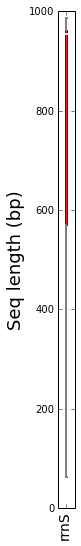

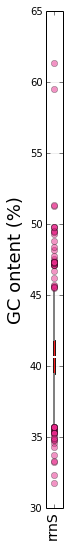

In [25]:
%matplotlib inline
pj.report_seq_stats()

In [26]:
# Define minima and maxima

gc_inliers = {
    'rrnS': [34,50]
}
len_inliers = {
    'rrnS': [500,1000]
}


# Apply to loci data
for locus in gc_inliers:
    # trim GC outliers
    pj.filter_by_gc_content(locus,
                            min_percent_gc=gc_inliers[locus][0],
                            max_percent_gc=gc_inliers[locus][1])

    # trim length outlier
    pj.filter_by_seq_length(locus,
                            min_length=len_inliers[locus][0],
                            max_length=len_inliers[locus][1])

Confirm that the length filter has worked.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


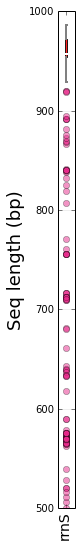

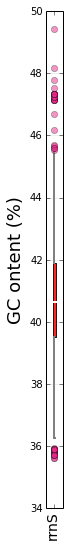

In [27]:
pj.report_seq_stats()

Pickle the project.

In [28]:
pickle_pj(pj, 'mam_post_SATIVA.pkl')

'mam_post_SATIVA.pkl'

# Long Alignment

Now, need to produce a sequence alignment file based on an alignment of all 12S sequences longer than 500bp. This will be done with the AlnConf class.

In [29]:
pj = unpickle_pj('mam_post_SATIVA.pkl', git=False)

muscle default configuration:

In [30]:
muscle_default = AlnConf(pj,
                         method_name="muscleDefault-500bp-SATIVA",
                         program_name="muscle",
                         loci=['rrnS'])

muscle -in 930031485246984.42_rrnS.fasta


In [31]:
pj.align([muscle_default])

In [32]:
print pj.used_methods['muscleDefault-500bp-SATIVA']

AlnConf named muscleDefault-500bp-SATIVA with ID 930031485246984.42
Loci: rrnS 
Created on: Tue Jan 24 08:36:24 2017
Commands:
rrnS: muscle -in 930031485246984.42_rrnS.fasta

Environment:
Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: MUSCLE v3.8.31\nPal2Nal v14
 Program reference:\nEdgar 2004: MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic Acids Research 32(5):1792-1797\nMikita Suyama
 David Torrents
 and Peer Bork (2006) PAL2NAL: robust conversion of protein sequence alignments into the corresponding codon alignments.Nucleic Acids Res. 34
 W609-W612.
execution time:
464.257634878


Core Methods section sentence:
The dataset(s) rrnS w

In [33]:
pj.alignments

{'rrnS@muscleDefault-500bp-SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (803 records of length 1385, IUPACProtein()) at 7fedd2b5e990>}

In [34]:
# record_id and source_organism are feature qualifiers in the SeqRecord object
files = pj.write_alns(id=['record_id','source_organism'],
                      format='fasta')
files

['rrnS@muscleDefault-500bp-SATIVA_aln.fasta']

Pickle the project.

In [35]:
pickle_pj(pj, 'mam_post_SATIVA.pkl')

'mam_post_SATIVA.pkl'

# Build tree from long alignment

Trim the alignment.

In [36]:
muscle_gappyout = TrimalConf(pj,                       # The Project

                            method_name='gappyout',  # Any unique string 
                                                     # ('gappyout' is default)
                            
                            program_name='trimal',   # No alternatives in 
                                                     # this ReproPhylo version
                            
                            cmd='default',           # the default is trimal. 
                                                     # Change it here
                                                     # or in pj.defaults['trimal']
                            
                            alns=['rrnS@muscleDefault-500bp-SATIVA'],  # 'all' by default
                            
                            trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                           )

trimal -in 331051485247451.8_rrnS@muscleDefault-500bp-SATIVA.fasta -gappyout


In [37]:
pj.trim([muscle_gappyout])

In [38]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 331051485247451.8
Alignments: rrnS@muscleDefault-500bp-SATIVA 
Created on: Tue Jan 24 08:44:11 2017
Commands:
rrnS@muscleDefault-500bp-SATIVA@gappyout: trimal -in 331051485247451.8_rrnS@muscleDefault-500bp-SATIVA.fasta -gappyout

Environment:Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
3.18862318993

Core Methods section sentence:
The alignment(s) rrnS@muscleDefault-500bp-SATIVA were trimmed using the

In [39]:
pj.trimmed_alignments

{'rrnS@muscleDefault-500bp-SATIVA@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (803 records of length 295, IUPACAmbiguousDNA()) at 7fedffa611d0>}

In [40]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault-500bp-SATIVA@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML. Configure RAxML for trimmed muscle alignment.

In [41]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-500bp-SATIVA-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@muscleDefault-500bp-SATIVA@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 435341485247456.78_rrnS@muscleDefault-500bp-SATIVA@gappyout0 -p 918 -s 435341485247456.78_rrnS@muscleDefault-500bp-SATIVA@gappyout.fasta -T 5 -x 771 -N 100


Infer tree.

In [42]:
pj.tree([raxml])

In [43]:
print pj.used_methods['raxml-muscleDefault-500bp-SATIVA-trimmed']

RaxmlConf named raxml-muscleDefault-500bp-SATIVA-trimmed with ID 435341485247456.78
Alignments: rrnS@muscleDefault-500bp-SATIVA@gappyout 
Created on: Tue Jan 24 08:44:16 2017
Commands:
rrnS@muscleDefault-500bp-SATIVA@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 435341485247456.78_rrnS@muscleDefault-500bp-SATIVA@gappyout0 -p 918 -s 435341485247456.78_rrnS@muscleDefault-500bp-SATIVA@gappyout.fasta -T 5 -x 771 -N 100

Environment:
Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.


In [44]:
pickle_pj(pj, 'mam_post_SATIVA.pkl')

'mam_post_SATIVA.pkl'

# Visualise Tree

Annotate final tree.

In [45]:
pj.add_qualifier_from_source('organism')

In [46]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [47]:
for species in ['Chelydra','Gallus','Xenopus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [48]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=None,
            html='muscleDefault-trimmed-500bp-mammal-raxml-post_SATIVA.html')

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [49]:
%%bash

last_png=$(ls -hlrt *rrnS@muscleDefault-500bp-SATIVA@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault_trimmed_mammal_500bp_SATIVA_raxml.png

Pickle the project.

In [50]:
pickle_pj(pj, 'mam_post_SATIVA.pkl')

'mam_post_SATIVA.pkl'

**=======================================================================================================**

In [51]:
pj = unpickle_pj('mam_post_SATIVA.pkl', git=False)

- Identify the record IDs of the sequences shorter than 500bp
- Write these sequences to new fasta file (make sure the sequence IDs are as Reprophylo expects them: 'id_f0')
- Prepare a hmm profile for the alignment the tree is built on (either muscle 'or mafft)

In [52]:
pj.alignments

{'rrnS@muscleDefault-500bp-SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (803 records of length 1385, IUPACProtein()) at 7fedc9f38750>}

In [53]:
from Bio import AlignIO

out=open('500bp_mammal_align_SATIVA.fasta','w')

AlignIO.write(pj.fta('rrnS@muscleDefault-500bp-SATIVA'), out, 'fasta')

returning trimmed alignment object rrnS@muscleDefault-500bp-SATIVA@gappyout


1

Check number of records in file containing short 12S rRNA sequences.

In [54]:
from Bio import SeqIO

records = list(SeqIO.parse("mammal_short_to_align_SATIVA.fasta", "fasta"))
print("Total records: %i" % len(records))

Total records: 241


Check that record IDs are in format that reprophylo expects for alignment.

In [55]:
from Bio import SeqIO

short_seq = open("mammal_short_to_align_SATIVA.fasta", "rU")
sequences = []

for r in SeqIO.parse(short_seq, "fasta"):
    print(r.id)

AY879429.1_f0
AY962041.1_f0
U12828.1_f0
KM224311.1_f0
AY879419.1_f0
EF056433.1_f0
KM224301.1_f0
HM026012.1_f0
KM224303.1_f0
U13090.1_f0
HM026016.1_f0
HM026014.1_f0
KM224300.1_f0
KT316285.1_f0
FJ688099.1_f0
EF056455.1_f0
JQ287753.1_f0
U13084.1_f0
AY879380.1_f0
HM026002.1_f0
EF027257.1_f0
AY962024.1_f0
EF027255.1_f0
KF781310.1_f0
KM224294.1_f0
KM224302.1_f0
AY773084.1_f0
EF056406.1_f0
JN415745.1_f0
EF056432.1_f0
AY027817.1_f0
EF027265.1_f0
EF056418.1_f0
EF027261.1_f0
HQ529638.1_f0
D50287.1_f0
HG962386.1_f0
HM026017.1_f0
KT316284.1_f0
KT316286.1_f0
KX381616.1_f0
KM224296.1_f0
HM026003.1_f0
AB793742.1_f0
KJ192507.1_f0
U13086.1_f0
GU350285.1_f0
KM224298.1_f0
AJ000852.1_f0
AY962039.1_f0
AJ000847.1_f0
EF056393.1_f0
EF056448.1_f0
EF056453.1_f0
HQ529681.1_f0
HQ996541.1_f0
JN415728.1_f0
AF334509.1_f0
EF056425.1_f0
AY027826.1_f0
JN415740.1_f0
AY027822.1_f0
HQ529674.1_f0
DQ852152.1_f0
AF334519.1_f0
HQ996530.1_f0
HQ529647.1_f0
HQ529675.1_f0
AY879434.1_f0
HQ529672.1_f0
AY879349.1_f0
AY027821.1_f0
AY

If record IDs were not in the format Reprophylo expects for tree construction, the code cells below could be used to format them to be 'id_f0'.

In [56]:
#temp_seq = []

#for r in pj.records:
    #if len(r.seq) < 500:
        #temp_seq.append(r)

#from Bio import SeqIO

#out=open('short_to_align.fasta','w')
#SeqIO.write(temp_seq, out, 'fasta')
#out.close()

In [57]:
#from Bio import SeqIO

#short_seq = open("short_to_align.fasta", "rU")
#sequences = []

#for r in SeqIO.parse(short_seq, "fasta"):
    #print(r.id)
    #r.description = r.id+'_f0'
    #r.id = r.description
    #print r.description
    #sequences.append(r)


#out = open("seq_to_align.fasta", "w")
#SeqIO.write(sequences, out, "fasta")
#out.close()

Check that sequences in reprophylo project have not been altered.

In [58]:
for r in pj.records:
    if len(r.seq) < 500:
        print r.id
        print r.description

AY879429.1
Ovis aries isolate TSS32 control region, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
AY962041.1
Mustela putorius haplotype Mph20 cytochrome b (CYTB) gene, partial cds; tRNA-Thr and tRNA-Pro genes, D-loop, and tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
U12828.1
Canis familiaris mitochondrion 12S rRNA gene, partial sequence.
KM224311.1
Mustela erminea isolate FRT87 12S ribosomal RNA gene, partial sequence; mitochondrial.
AY879419.1
Ovis aries isolate TMS5 control region, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
EF056433.1
Ovis aries isolate Lonand_27805 control region, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
KM224301.1
Lepus europaeus isolate FRT77 12S ribosomal RNA gene, partial sequence; mitochondrial.
HM026012.1


Pickle the project.

In [59]:
pickle_pj(pj, 'mam_post_SATIVA.pkl')

'mam_post_SATIVA.pkl'

# Add short sequences to reference alignment

In [1]:
!hmmbuild 12S_mammal_ref_SATIVA.hmm 500bp_mammal_align_SATIVA.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             500bp_mammal_align_SATIVA.fasta
# output HMM file:                  12S_mammal_ref_SATIVA.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen     W eff_nseq re/pos description
#---- -------------------- ----- ----- ----- ----- -------- ------ -----------
1     500bp_mammal_align_SATIVA   803   295   295   436     1.94  0.450 

# CPU time: 0.13u 0.00s 00:00:00.13 Elapsed: 00:00:00.13


Now use hmmalign to align the short 12S rRNA sequences to the longer reference alignment.

In [2]:
%%bash

hmmalign -o 12S_mammal500bpref_plus_short_query_SATIVA.sto \
--mapali 500bp_mammal_align_SATIVA.fasta \
12S_mammal_ref_SATIVA.hmm mammal_short_to_align_SATIVA.fasta

The hmmalign command has produced a file containing a new alignment of all 12S rRNA sequences (long and short) in stockholm output format. This must be converted to a more useful file format such as fasta or GenBank using the Seq command in BioPython.

In [3]:
from Bio import AlignIO

input_file = open("12S_mammal500bpref_plus_short_query_SATIVA.sto", "rU")
output_file = open("12S_MammalAlign_ALL_SATIVA.fasta", "w")

alignment = AlignIO.read(input_file, "stockholm")
count = len(alignment)
AlignIO.write(alignment, output_file, "fasta")

output_file.close()
input_file.close()
print("Converted %i records" % count)

Converted 1044 records


# Tree Building

In [4]:
from reprophylo import *

The fasta file containing the 12S rRNA amphibian sequence alignment must now be converted into a format which can be used for alignment trimming. The alignment must be parsed to an alignment object, aln.

In [5]:
pj=unpickle_pj('mam_post_SATIVA.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [6]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

aln = AlignIO.read(open("12S_mammal500bpref_plus_short_query_SATIVA.sto"), "stockholm", alphabet=generic_dna)
for r in aln:
    print(r.id + " is " + str(len(r)) + "bp")

EF122793.1_f0 is 1182bp
JN860636.1_f0 is 1182bp
KF471517.1_f0 is 1182bp
EF373884.1_f0 is 1182bp
EF373885.1_f0 is 1182bp
EF373883.1_f0 is 1182bp
KP211422.1_f0 is 1182bp
EF373899.1_f0 is 1182bp
AP003321.1_f0 is 1182bp
FJ610338.1_f0 is 1182bp
FJ610339.1_f0 is 1182bp
KX512321.1_f0 is 1182bp
EF373904.1_f0 is 1182bp
KM886936.1_f0 is 1182bp
AY235570.1_f0 is 1182bp
GU261698.1_f0 is 1182bp
GU261674.1_f0 is 1182bp
AP003317.1_f0 is 1182bp
GU261680.1_f0 is 1182bp
GU261678.1_f0 is 1182bp
GU261693.1_f0 is 1182bp
AB086102.1_f0 is 1182bp
GU261683.1_f0 is 1182bp
KT626848.1_f0 is 1182bp
KP211419.1_f0 is 1182bp
GU261707.1_f0 is 1182bp
GU261694.1_f0 is 1182bp
AP003318.1_f0 is 1182bp
M10217.1_f0 is 1182bp
Y10943.1_f0 is 1182bp
M27605.1_f0 is 1182bp
AY581639.1_f0 is 1182bp
AY581648.1_f0 is 1182bp
AY581644.1_f0 is 1182bp
AY581640.1_f0 is 1182bp
AY581638.1_f0 is 1182bp
AY245607.1_f0 is 1182bp
KJ868122.1_f0 is 1182bp
JN003394.1_f0 is 1182bp
KF783166.1_f0 is 1182bp
KF783165.1_f0 is 1182bp
NC_002080.2_f0 is 1182

In [7]:
pj.alignments['rrnS@mammal_align_allseq_SATIVA'] = aln

In [8]:
pj.alignments

{'rrnS@mammal_align_allseq_SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1044 records of length 1182, DNAAlphabet()) at 7fed0ffa3290>,
 'rrnS@muscleDefault-500bp-SATIVA': <<class 'Bio.Align.MultipleSeqAlignment'> instance (803 records of length 1385, IUPACProtein()) at 7fed0fa67390>}

In [9]:
pj.alignments.keys()

['rrnS@mammal_align_allseq_SATIVA', 'rrnS@muscleDefault-500bp-SATIVA']

Trim the alignment.

In [10]:
gappyout = TrimalConf(pj,                      # The Project

                      method_name='gappyout',  # Any unique string 
                                               # ('gappyout' is default)

                      program_name='trimal',   # No alternatives in 
                                               # this ReproPhylo version

                      cmd='default',           # the default is trimal. 
                                               # Change it here
                                               # or in pj.defaults['trimal']

                      alns=['rrnS@mammal_align_allseq_SATIVA'],# 'all' by default

                      trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                      )

trimal -in 287791485251363.74_rrnS@mammal_align_allseq_SATIVA.fasta -gappyout


In [11]:
pj.trim([gappyout])

In [12]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 287791485251363.74
Alignments: rrnS@mammal_align_allseq_SATIVA 
Created on: Tue Jan 24 09:49:23 2017
Commands:
rrnS@mammal_align_allseq_SATIVA@gappyout: trimal -in 287791485251363.74_rrnS@mammal_align_allseq_SATIVA.fasta -gappyout

Environment:Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
4.66232204437

Core Methods section sentence:
The alignment(s) rrnS@mammal_align_allseq_SATIVA were trimmed using t

In [13]:
pj.trimmed_alignments

{'rrnS@mammal_align_allseq_SATIVA@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1044 records of length 284, IUPACAmbiguousDNA()) at 7fed1141bf50>,
 'rrnS@muscleDefault-500bp-SATIVA@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (803 records of length 295, IUPACAmbiguousDNA()) at 7fed1376a750>}

In [14]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault-500bp-SATIVA@gappyout_trimmed_aln.fasta',
 'rrnS@mammal_align_allseq_SATIVA@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML.

Configure RAxML.

In [15]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@mammal_align_allseq_SATIVA@gappyout'],
                  model='GAMMA', 
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 742831485251371.75_rrnS@mammal_align_allseq_SATIVA@gappyout0 -p 873 -s 742831485251371.75_rrnS@mammal_align_allseq_SATIVA@gappyout.fasta -T 5 -x 171 -N 100


In [16]:
pj.tree([raxml])

In [17]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 742831485251371.75
Alignments: rrnS@mammal_align_allseq_SATIVA@gappyout 
Created on: Tue Jan 24 09:49:31 2017
Commands:
rrnS@mammal_align_allseq_SATIVA@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 742831485251371.75_rrnS@mammal_align_allseq_SATIVA@gappyout0 -p 873 -s 742831485251371.75_rrnS@mammal_align_allseq_SATIVA@gappyout.fasta -T 5 -x 171 -N 100

Environment:
Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution tim

In [18]:
pj.trees.keys()

['rrnS@muscleDefault-500bp-SATIVA@gappyout@raxml-muscleDefault-500bp-SATIVA-trimmed',
 'rrnS@mammal_align_allseq_SATIVA@gappyout@raxml-muscleDefault-trimmed']

Pickle the project.

In [19]:
pickle_pj(pj, 'mam_post_SATIVA.pkl')

'mam_post_SATIVA.pkl'

# Visualise tree

Now let's visualize the tree containing all 12S rRNA sequences with outliers identified by SATIVA removed.

- Prepare tree annotation:
- define outgroups
- specify support coloration

In [20]:
pj.add_qualifier_from_source('organism')

In [21]:
for species in ['Chelydra','Gallus','Xenopus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [22]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [23]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-mammal-all-SATIVA-raxml.html')

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [24]:
%%bash

last_png=$(ls -hlrt *rrnS@mammal_align_allseq_SATIVA@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-mammal-all-SATIVA-raxml.png

Pickle the project.

In [25]:
pickle_pj(pj, 'mam_post_SATIVA.pkl')

'mam_post_SATIVA.pkl'

Write out alignment for pplacer input. Need to modify record id - remove the '_f0' that is appended by Reprophylo.

In [26]:
from Bio import AlignIO

aln = pj.fta('rrnS@mammal_align_allseq_SATIVA@gappyout')

for r in aln:
    r.id = "_".join(r.id.split("_")[:-1])
    r.description = r.id
    
out=open('../12S_UKmammals_SATIVA_cleaned.alignment.fasta', 'w')
AlignIO.write(aln, out, 'fasta')
out.close()

out=open('../12S_UKmammals_SATIVA_cleaned.alignment.phylip', 'w')
AlignIO.write(aln, out, 'phylip-relaxed')
out.close()

returning trimmed alignment object rrnS@mammal_align_allseq_SATIVA@gappyout
